### Examining the data

Dependent variable olan SalePrice üzerine inceleme yapıp ne olduğunu anlamaya çalışacağız. Sonrada birden fazla değişken için bakacağız. Hedef değişkenimiz yani dependent variable ile independent variable arasındaki ilişkileri anlamaya çalışacağız. SalePrice hangi özelliklerle yakından ilişkili bunları analiz etmeye çalışacağız.

Temizleme yapacağız, missing data'ya bakacağız, outliers 'lara bakacağız ve kategorik variable 'ları kullanabilceğimiz hale getirmeye çalışacağız.

Skewness ve Kurtosis incelemesi yapacağız.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)  #bütün satır ve sütunları görmek için (none demek bütün hepsini göster demek oluyor)

title_style = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_style  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Project'
os.chdir(PATH)
os.listdir() 

['house-prices-train.csv',
 'train.csv',
 'gauge-meter-chart.html',
 'comprehensive-EDA-house-price-student.ipynb',
 'EDA1.ipynb',
 'hist2.png',
 'House_Price_Prod.ipynb']

In [ ]:
df_train = pd.read_csv('train.csv')  #dataframe hale dönüştürdük
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

Mesela burda incelediğimizde **Alley** sütunu için NaN değerlerin olduğunu gözlemleyebiliriz ve missing dataların olduğunu söyleyebiliriz ve bu şekilde NaN değerlerin olduğunu ve onları inceleyeceğimize dair bir yere not alıyoruz.

Veri seti içerisinde hangi Feature'lar benim için önemli olabilir. Ev alacak olsam hengi Feature 'lara dikkat ederdim bunun üzerinde duruyoruz. Kategorik olanlarda hangi değerler var, numeric olanlarda genel dağılımı incelemeye çalışıyoruz.

Genel bir değerlendirme yapabiliriz ve bu bize bina ile ilgili olarak bir öngörü sağlar. Mesela, binalara numaralandırma **OverallQual** ile numaralar verilmiştir 1-10 arasında.

In [ ]:
 #check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

SalePrice 'ı nelerin etkilediğini düşünmeliyiz ve buna göre yorum yapmaya çalışcağız.

Benim için temel, önemli olan bazı sütunlar var:



*   OverallQual
*   GrLivArea
*   YearBuilt
*   TotalBsmSF

4 tane sütun belirledim. Ama daha sonra **Garage** ile ilgili olanlara bakabilirim. Mesela **GarageType** incelenebilir, eve doğrudan Attached olup olmadığını incelemeye çalışacağız veya **GarageCars** incelenebilir, kaç araba aynı anda sığabilir buna göre analiz üzerinde durmaya çalışacağız











### Analyzing 'SalePrice'

Öncelikle SalePrice' ı analiz etmeyle başlacağız ve univariate analiz üzerinde durmaya çalışacağız. 

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**describe()** yardımıyla öncelikle verimdeki min-max-mean vs. gibi değerleri incelemek istiyoruz. Mesela burda **mean** değerine göre **std** nin baya yüksek olduğunu gözlemleyebiliriz. 

Mesela burda tedirgin eden bir taraf daha var, dağılıma baktığımızda **min** 34 bin civarında ve yaklaşık 90 bin sonra da verinin **%25** 'ini elde etmiş oluyoruz, bundan yaklaşık 30 bin sonra **%50** 'sini elde ediyoruz, 50 bin kadar daha fazlasını eklediğimizde **%75** 'ini elde etmiş oluyoruz. Ama **max** 'ı incelemek istersek, bizi endişelendirebilecek kadar yüksek bir değere sahip olduğunu söyleyebiliriz.



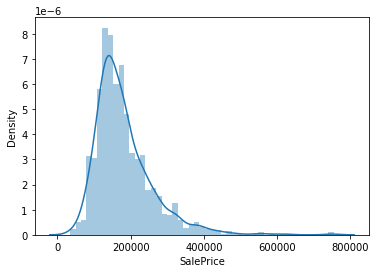

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

**displot()** yardımıyla distribution olarak nasıl dağıldığına bakmak istiyorum. Ve sonuç olarak **Right (Positive) Skewness** olduğunu gözlemleyebiliriz. 

Bir diğer yandan **Kurtosis** olma durumunu inceleyebilir ve plot üzerinde görüldüğü gibi pick yaptığı (istenilen eğrinin dışında verilerin olduğunu) gözlemleyebiliriz.

Tabi plotly çizimi ile bunu interaktif olarak daha net olarak inceleyebiliriz.

In [ ]:


fig = px. histogram(df_train, x='SalePrice')
fig.show()

In [ ]:
fig = px. histogram(df_train, x='SalePrice', histnorm ='probability density')   # histnorm ile bana y eksininde yüzde kaç dağıldığını gösteriyor. Yukarıdaki plot da sayılar üzerinden gidiyorken burda artık yüzdeler üzerinden ilerlemiş oluyoruz. u işareti gelidğinde yüzde 0.7 demek olur, yüzde birden aşağıda yani

fig.show()

Böylece plot üzerinde gördüğümüz şekli sayısal olarak da desteklemiş ve Kurtosis olduğunu kesinleştirmiş olduk.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd']
df_train[cols].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,TotRmsAbvGrd
0,208500,7,1710,2,856,2,2003,8
1,181500,6,1262,2,1262,2,1976,6
2,223500,7,1786,2,920,2,2001,6
3,140000,7,1717,3,756,1,1915,7
4,250000,8,2198,3,1145,2,2000,9


Burda evi seçme konusunda tercih edebileceğimiz bazı **Kategorik ve Numeric Feature**' ları seçerek **SalePrice** ile olan ilişkisine bakmak istiyoruz ve buna yönelik tek tek incelemek yapmaya çalışacağız. 

In [ ]:
fig = px.scatter(df_train, x="GrLivArea", y="SalePrice")
fig.show()

İlk olarak **SalePrice** ın **GrLivArea** ile olan ilişkisine bakmak istersek şunu söyleyebiliriz ki **SalePrice** arttıkça **GrLivArea** değerlerinde de bir artış vardır. Ama diğer yandan görüldüğü gibi en sağda iki tane değerimizin **Outlier** olduğunu söyleyebiliriz. **GrLivArea** da artış olmasına rağmen **SalePrice** üzerinde bir artış gözlemlenmemiştir. Genel olarak aralarında lineer bir ilişki olduğunu ve birbirleriyle oldukça bağlantılı olduğunu söyleyebilirim.


In [ ]:
fig = px.scatter(df_train, x="TotalBsmtSF", y="SalePrice")
fig.show()

Burda ise **TotalBsmtSF** için yorumlayacak olursak, bu sefer **SalePrice** ile aralarında tam lineer olmayan ve  **Exponensial** tarzda bir ilişki olduğunu söyleyebiliriz. Ve en sağda ise bir outlier(aykırı değer) olduğunu gözlemleriz. Daha sonra incelemek üzere not alabiliriz.

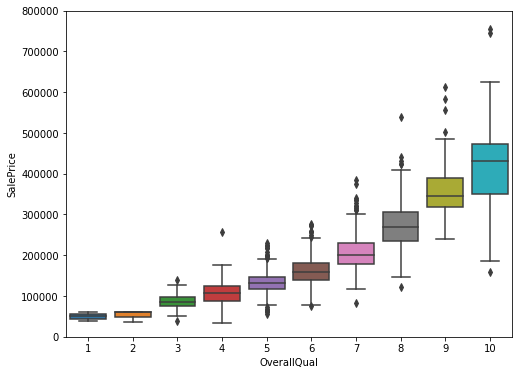

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Kategorik bir değer olan **OverallQual** ile **SalePrice** arasındaki ilişkiye bakmak istiyoruz bu sefer. **Kategorik** bir değişkeni **Numerik** bir değişkenle kıyaslamanın en iyi yollarından birisi **boxplot()** olduğu için bu şekilde incelemeyi tercih edebiliriz. 

Ve sonuç olarak şunu söyleyebilirim ki **OverallQual** sayısı arttıkça **SalePrice** değerininde arttığını gözlemleyebiliyorum.

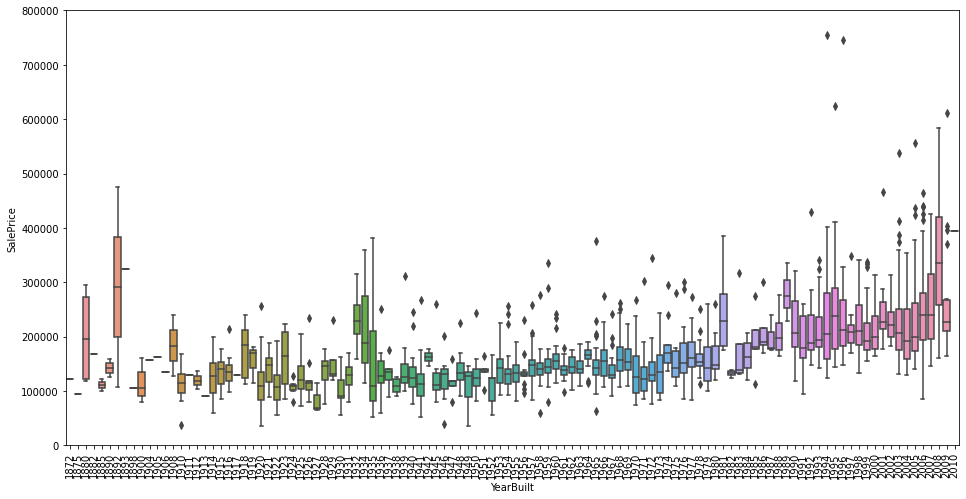

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Tabi ki binanın yaşı için **YearBuilt** benim için önemli bir feature ve onu incelemek istiyoruz. Sonuç olarak **1937** yılından sonra bazı yıllar hariç genel olarak az da olsa bir artış olduğunu söyleyebiliriz.

In [ ]:

fig = px.box(df_train, x="YearBuilt", y="SalePrice")
fig.show()

### Plasma Soup

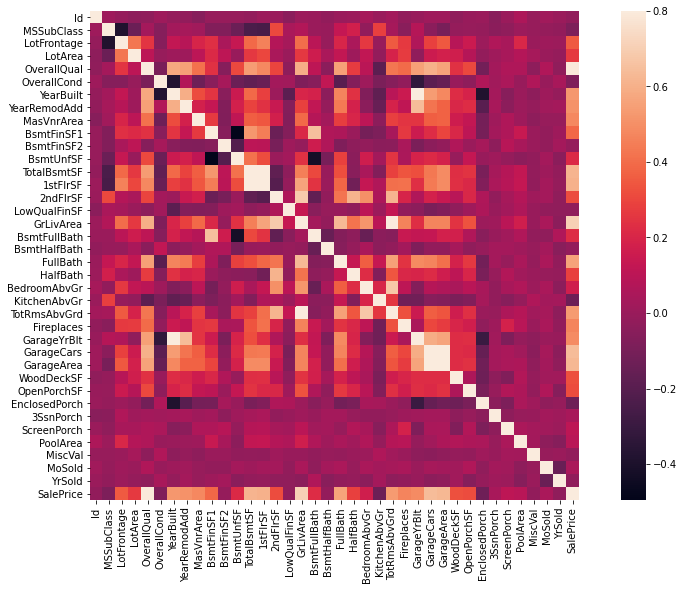

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Heat Map** incelendiği zaman dikkat çeken colleration olan feature'ları incelediğimiz zaman şunları söyleyebiliriz:
- **GarageCars** ile **GarageArea** arasındadır. 
- Mesela, **TotalBsmtSF** ile **1stFlrSF** arasında da güçlü bir ilişki olduğunu söyleyebiliriz.
- **GarageYrBlt** ile **YearBuilt** arasında güçlü bir ilişki var.
- **GrLivArea** ile **TotRmsAbvGr** arasında güçlü bir ilişki var.


Feature'ların kendi aralarında correlation olma durumlarının yanında **SalePrice** ile olan ilişkilerini inceleyecek olursak eğer:
-  İlk başta dikkat çeken **OverallQual** var. 
-  **YearBuilt**,  **YearRemodAdd**,  **MasVnrArea**,  **TotalBsmtSF**, **1stFlrSF**, **GrLivArea**, **FullBath**, **TotRmsAbvGr**, **GarageCars**, **GarageArea** bunların diğerleri arasında SalePrice ile daha güçlü ilişkisi olduğunu ve dikkate alabilceğimizi söyleyebiliriz.

In [ ]:
df_train_corr = df_train.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_train_corr[abs(df_train_corr) >0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Correlation durumlarda 0.3 ile 0.7 arasında bir ilişki varsa bunu dikkate alabilirim, değerlendirebilirim demektir. Bunu gözlemleyebilmek adına correlation değeri **0.4** den büyük olan değerleri ekranda gözlemlemek istiyoruz, ve bize **SalePrice** ile yapılan **en güçlü 10 correlation** değerini döndürüyor.




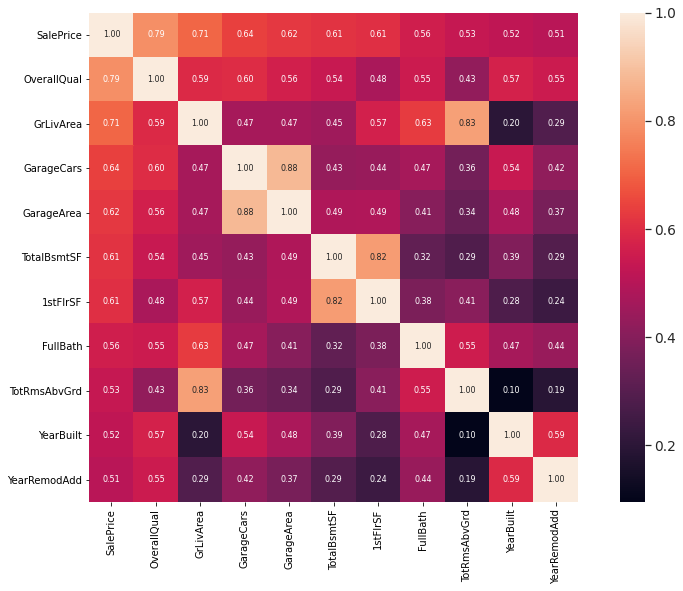

In [ ]:
 #saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

Aralarında **multicollinearity** olan feature'ları inceliyoruz ve **'SalePrice'** ile arlarında olan ilişkleri değerlendirerek colaration özelliği yüksek olan feature değerinini elimizde tutup diğerini **drop()** etmeye karar vereceğiz. Feature' lar arasında multicollinearity olam durumlarını incleeyecek olursak:

- **'GarageCars'** ile **'GarageArea'** arasında var. **'SalePrice'** ile olan ilişkilerinin değerlerine baktığımda **'GarageCars'** ile **0.64** , **'GarageArea'** ile **0.62** olduğunu görüyoruz. Bu nedenle **'GarageCars'** 'ı tutup **'GarageArea'** 'yı drop etmeye karar veriyoruz.

- **'TotalBsmtSF'** ile **'1stFlrSF'** arasında vardır. Aynı şekilde incelendiğinde ikisinin de **0.61** olduğunu gözlemleyebiliriz ama biz **TotalBsmtSF** ile devam etmeye karar vereceğiz. 

- **'GrLivArea'** ile **'TotRmsAbvGrd'** arasında **0.83** ile güçlü bir multicollinearity olduunu gözlemleyebiliriz. **'SalePrice'** ile olan colleration değerlerine baktığımızda **'GrLivArea'** ile **0.71** ama **'TotRmsAbvGrd'** ile **0.53** olduğunu söyleyebiliriz. Ve dolayısıyla **GrLivArea** ile devam edip **TotRmsAbvGrd** 'yi drop etmeye karar veriyoruz.

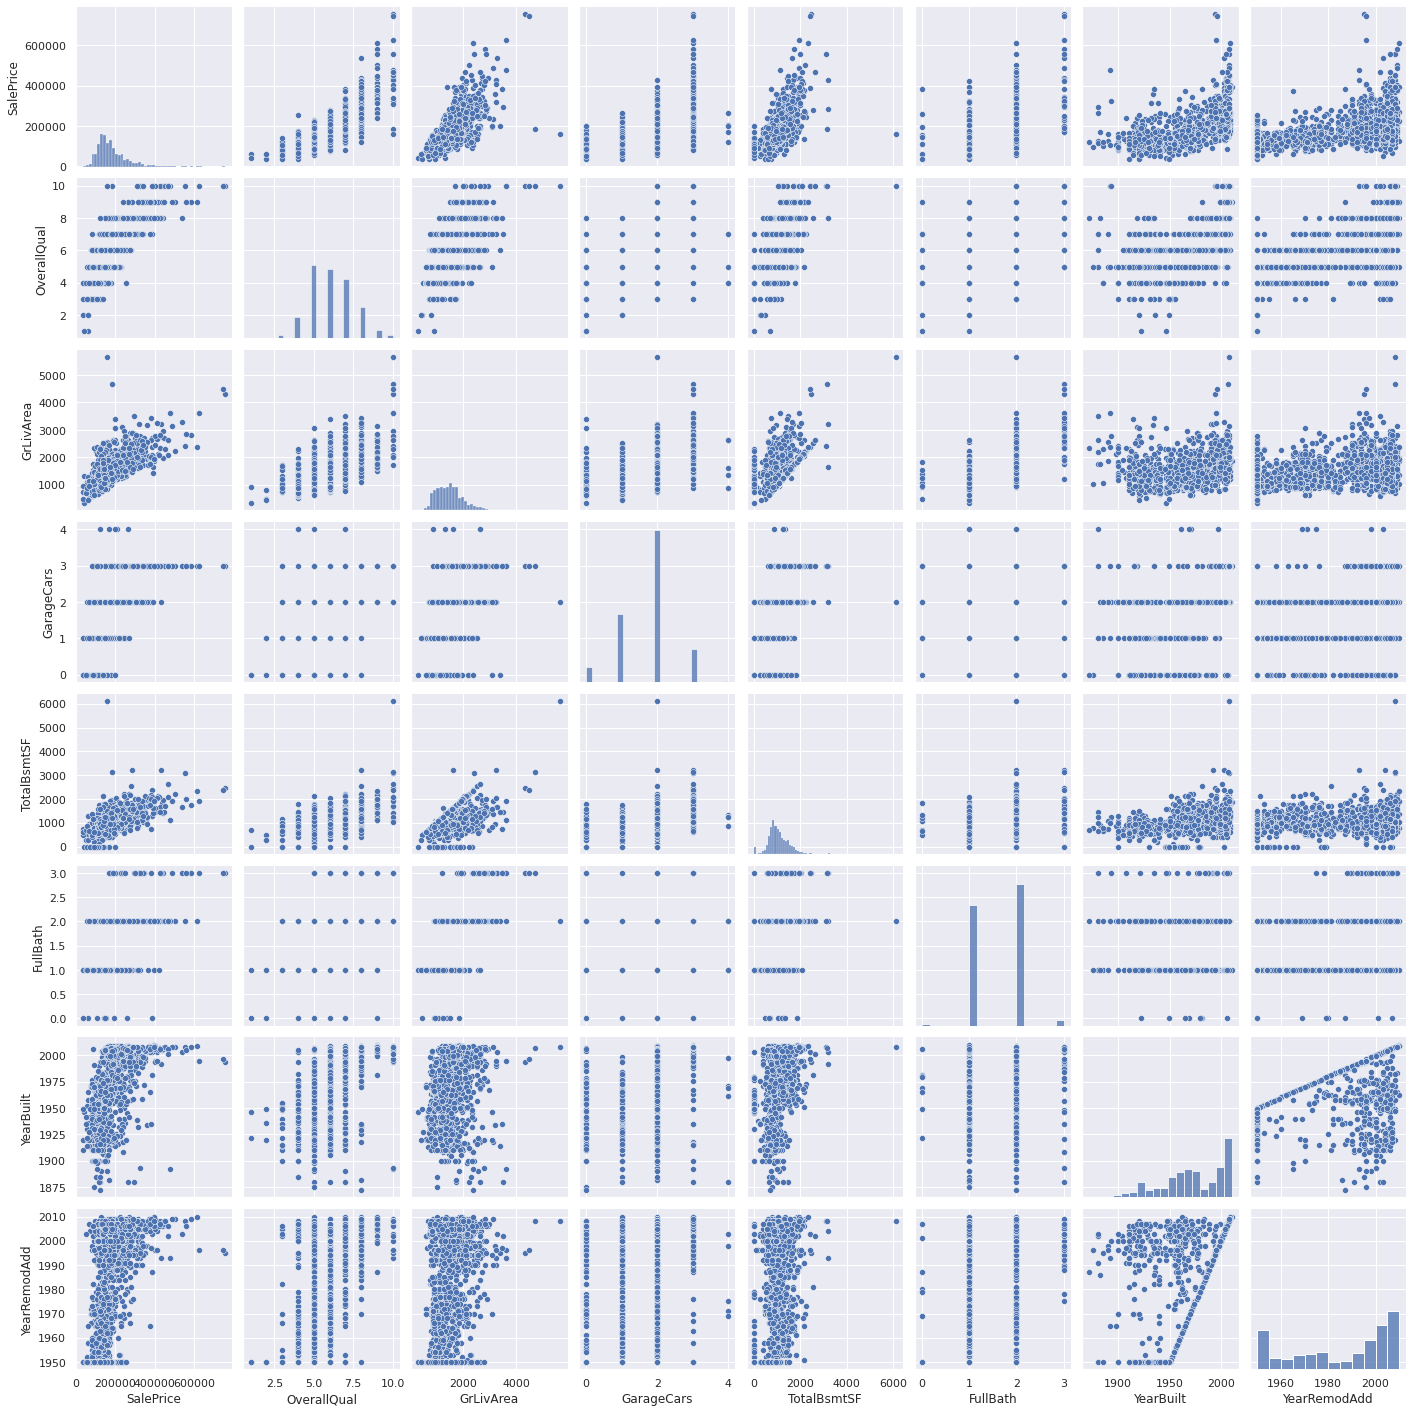

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
import plotly.express as px

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
# fig = px.scatter_matrix(df_train[cols])
fig = px.scatter_matrix(df_train,
                        dimensions = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd'],
                        height = 600
                        )

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
#corr = df_train.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
#plt.figure(figsize=(12, 10))

#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#            annot=True, annot_kws={"size": 8}, square=True);

Amacımız **varyansı maximum seviyede korumak** . Yani varyansı diğer feature 'larla tanımlayabilmektir. Ve **'SalePrice'** yani dependent variable ile coleration olmasını isteiyoruz ama  bunun independent variable 'lar arasında olmasını istemiyoruz.

### Missing Data

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#hangi feature 'ın toplam kaç tane değerinin kayıp olduğunu ve bunun yüzdesini burda görebiliyorum

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Hangi feature 'ın toplam kaç tane değerinin kayıp olduğunu ve bunun yüzdesini burda görebiliyorum. Genel olarak inceleyecek olursak eğer:

- **'PoolQC'** için toplam **1460** veriden **1453** tanesinin kayıp olduğunu gözlemleyebiliriz. Ve bu verinin **%99** 'u kayıp durumda, bu feature daki eksik verileri tamamlamak mümkün değil diyebiliriz.
- **'MiscFeature'** , **'Alley'** feature 'ları içinde aynı durum geçerlidir aslında. Bu feature 'ları drop etmeye karar veriyoruz.
- Aslında şöyle bir karar alabiliriz, **%15** den fazla veri kaybı olan feature 'ları drop edebililiriz. **'GarageFond'** kadar drop ederiz,sonrası içinde burdaki kayıp değerleri bir şekilde doldurup tamamlayabiliriz ama bu seferde kendimize şöyle bir soru sorup hangilerini dolduracağımıza karar vermemiz gerekiyor, Bu Feauture benim için önemli mi? **SalePrice** 'ı etkileyecek bir özellik mi? Mesela **'Electrical'** feature da sadece **1** tane veri kayıp (NaN) ama bizim **SalePrice** değerimle doğrudan bir ilişkisi olduğunu düşünmediğimiz için **'Electrical'** feature 'ını da drop etmeye karar veriyoruz.



In [ ]:

#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

### Univariate analysis

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Standard Scaled ettiğim data 'nın en büyük ve en küçük 10 değerini alıyoruz. Standartize etme durumunda ortlamanın 0  ve standard sapmasının 1 olması beklenir ve bu duruma göre elde edilen en büyük ve en küçük değerleri inceleyecek olursak:
 - Low değerlerin standart sapmadan bir standart sapma kadar uzaklaştığını ve -1 civarında olduklarını gözlemleriz.
 - High değerler için ise standart sapmadan baya bir uzaklaştığımızı gözlemleyebiliriz. Özellikle 7'den büyük olanlar gözümüze çarpıyor.

### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


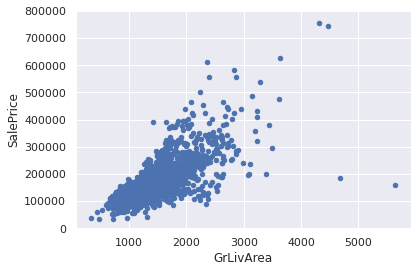

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Tekrardan yukarda yaptığımız gibi **SalePrice** ile **GrLivArea** arasındaki ilişkiye bakcağız ve daha önceden belirlediğimiz **outlier** olarak gördüğümüz değerleri drop etmeye çalışacağız.

In [ ]:
import plotly.express as px

fig = px.scatter(df_train, x="GrLivArea", y="SalePrice")
fig.show()

Plotly yardımıyla incelediğimiz de en sağdaki iki **outlier** 'ın isimlerini öğrenerek onları drop etmeye çalışacağız. Mesela veriseti içerisinde outlier olarak düşündüğümüz değerlerin kodlarını kullanarak kontrol edebiliriz ve **'Id'** 'lerini öğrenebiliriz, drop edebiliriz.

In [ ]:
df_train[df_train['GrLivArea'] == 4676]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [ ]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
# df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676])
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


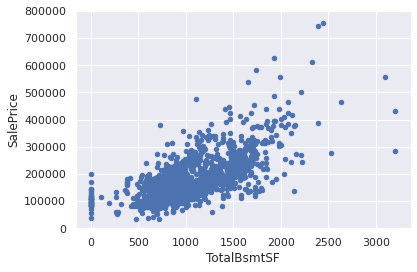

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Aynı şekilde **TotalBsmtSF** ile **SalePrice** arasındaki ilişkiyi incelemeye çalışırsak şunu farkedebiliriz ki , ilk çizdiğimiz grafikte outlier olarak belirlediğimiz değeri bu sefer grafik üzerinde göremiyoruz. Ve buna dayanarak şu yorumu yapabiliriz aslında, **GrLivArea** için satırları drop ettiğimiz zaman **TotalBsmtSF** ile ortak değeri bulunan satırıda silmiş olabiliriz.Dolayısıyla **TotalBsmtSf** için belirlediğimiz outlier 'ı otomatik olarak silmiş oluyoruz.

In [ ]:
import plotly.express as px

fig = px.scatter(df_train, x="TotalBsmtSF", y="SalePrice")
fig.show()

### Checking Relationships

**SalePrice** 'ı **Street** 'lere göre kıyaslamak istiyoruz. Yani hangi street de ortalama hanfi fiyata ev bulabiliriz. Bunun içinde Saple price üzerinde bir bucketize yapmak istiyoruz.

In [ ]:
print(df_train.groupby("Street")["SalePrice"].mean())

Street
Grvl    130190.500000
Pave    181152.000689
Name: SalePrice, dtype: float64


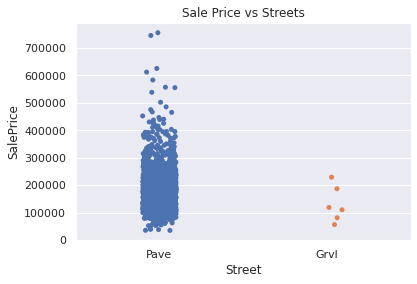

In [ ]:
#most streets are paved lets visulalize it
sns.stripplot(x=df_train["Street"], y=df_train["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

Eğer GrLivArea ile SalePrice arasındaki ilişkiyi bazı featureları inceleyerek etkileyip etkilemediği üzerine yorum yapmak istiyorum. Bunun için item 'ları 0 ve 1 cinsinde belirterek var olup olmadıklarını ve nasıl etkildeğine bakmak istiyorum.

### Derived Characteristics


Certain characteristics of a house are assumed to have a "binary" influence on the sales price. For example, the existence of a pool could be an important predictor while the exact size of the pool can be deemed not so important.

The below cell creates boolean factor variables out of a set of numeric variables.

In [ ]:
derived_variables = {
    "has2ndFlr": "2ndFlrSF",
    "hasBsmt": "TotalBsmtSF",
    "hasFireplace": "Fireplaces",
    "hasGarage": "GarageArea",
    "hasPool": "PoolArea",
}
# Factorize numeric columns.
for factor_column, column in derived_variables.items():
    df_train[factor_column] = df_train[column].apply(lambda x: 1 if x > 0 else 0)
derived_variables = list(derived_variables.keys())


In [ ]:
new_variables = []
new_variables.extend(derived_variables)

Ve factoize işleminden sonra belirlediğimiz özelliklerin yeni gösterim hali bu şekildedir.

In [ ]:
df_train[derived_variables].head()

,has2ndFlr,hasBsmt,hasFireplace,hasGarage,hasPool
0,1,1,0,1,0
1,0,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0


A second floor may have a positive effect on the sales price. However, having a second floor correlates with overall living space. The individual effect is therefore not as clear as it seems in the plot below.

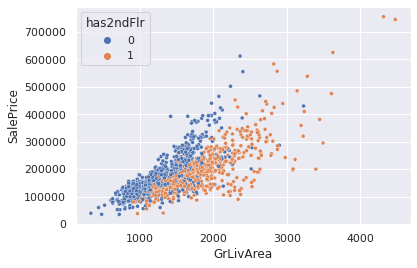

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has2ndFlr", s=15, data=df_train);

Nearly all houses in Ames, IA, have a basement. Therefore, hasBsmt is most likely not an important predictor.

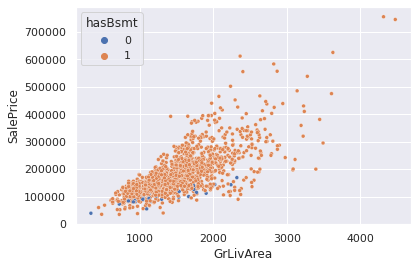

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="hasBsmt", s=15, data=df_train);


Bigger houses are more likely to have a fireplace. Thus, the variable has Fireplace might be an interesting predictor.

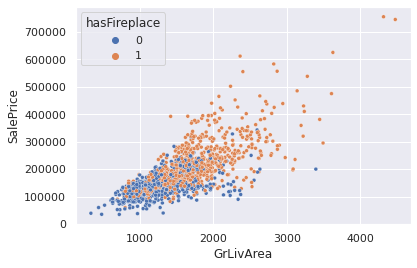

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="hasFireplace", s=15, data=df_train);

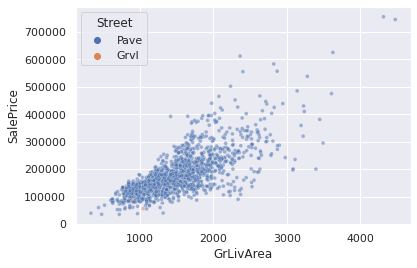

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Street", s=15, alpha=.5 ,data=df_train);

### Bucketize

In [ ]:
df_train['YearBuilt'].agg(['mean','max','min','median'])

mean      1971.194235
max       2010.000000
min       1872.000000
median    1972.000000
Name: YearBuilt, dtype: float64

**YearBuilt** üzerinde bir bucketize yaparak **OverallQual** ile olan ilişkisine bakmak istiyorum. Bunun içinde öncelikle **min**,**max** ve **mean** hesabını yaparak ayıracağım sınırları belirlemek istiyoruz.  1872-1972, **1972-2000** yılları arası ve **2000** den sonraki yıllar olacak şekilde **YearBuilt** 'i üç gruba ayırıyorum.

In [ ]:
def bucketize(year_built):
    if (year_built >= 1872) and (year_built <1972):
        return '1872_1972'
    elif (year_built >= 1972 ) and (year_built < 2000):
        return '1972_2000'
    else:
        return 'More_2000'

In [ ]:
df_train['Byear_Group'] = df_train['YearBuilt'].apply(bucketize)
display(df_train.head())
df_train.groupby("Byear_Group")["YearBuilt"].count()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has2ndFlr,hasBsmt,hasFireplace,hasGarage,hasPool,Byear_Group
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,1,0,1,0,More_2000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,1,1,1,0,1972_2000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,1,1,1,0,More_2000
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,1,1,1,0,1872_1972
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,1,1,1,0,More_2000


Byear_Group
1872_1972    706
1972_2000    366
More_2000    385
Name: YearBuilt, dtype: int64

706 tane 1872 ile 1972 yılları arasında inşa edilmiş ev varmış. Aynı şekilde 366 tane 1972 ile 2000 arasında ve 385 tane de 2000 yılından sonra inşa edilmiş evler varmış.

In [ ]:
Byear_Over = df_train.groupby('Byear_Group')['OverallQual']
Byear_Over

In [ ]:
#By = df_train[df_train['OverallQual'] & (df_train['Byear_Group'] == 'More_2000')]
#By.head()

Oluşturulan grafikde inceleneceği gibi **2000** yılından sonra inşa edilen evlerin **OverallQual** değerleri çoğunlukla **7** den sonra yüksek olduğu yerlerde gözlemlenmiştir. Genel olarak toparlayıcı bir yorum yapacak olursak evlerin yapım yılları artıkça hem **SalePrice** 'ların arttığı hem de **OverallQual** değerlerinin arttığını söyleyebiliriz. 

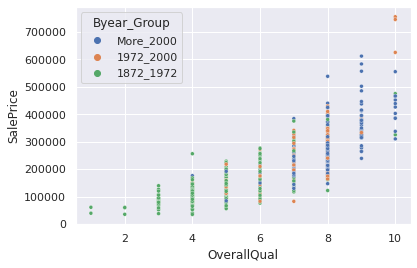

In [ ]:
sns.scatterplot(x="OverallQual", y="SalePrice", hue="Byear_Group", s=15, data=df_train);

In [ ]:
df_train['SalePrice'].agg(['min','max','mean'])

min      34900.000000
max     755000.000000
mean    180942.138641
Name: SalePrice, dtype: float64

Bu sefer de **SalePice** değerlerine göre bucketize yapmak istiyoruz ve **min**, **max**, **mean** ölçümlerini kullanarak sınırları belirlemek istiyoruz. **SalePrice** 'ı üç gruba ayırmış oluyoruz.

In [ ]:
def make_discrete(sale_price):
    if (sale_price >= 34000) and (sale_price <180000):
        return '34_180'
    elif (sale_price >= 180000 ) and (sale_price < 400000):
        return '180_400'
    else:
        return 'More_400'

In [ ]:
df_train['Sale_group'] = df_train['SalePrice'].apply(make_discrete)
display(df_train.head())
df_train.groupby("Sale_group")["SalePrice"].count()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has2ndFlr,hasBsmt,hasFireplace,hasGarage,hasPool,Byear_Group,Sale_group
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,1,0,1,0,More_2000,180_400
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,1,1,1,0,1972_2000,180_400
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,1,1,1,0,More_2000,180_400
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,1,1,1,0,1872_1972,34_180
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,1,1,1,0,More_2000,180_400


Sale_group
180_400     545
34_180      884
More_400     28
Name: SalePrice, dtype: int64

34.000 ile 180.000 arasında fiyatlara sahip 884 tane ev varmış, 180.000 ile 400.000 arasında 545 tane ev, 400.000 dan fazla fiyata sahip 28 tane ev varmış yorumuna ulaşırız.

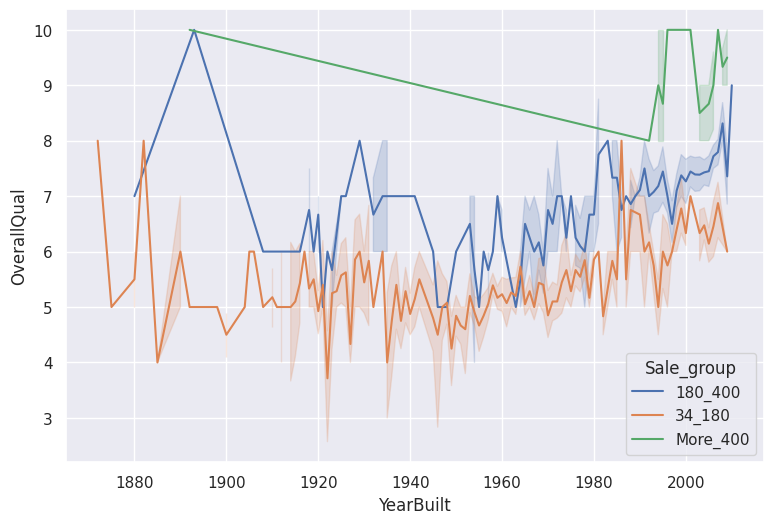

In [ ]:
plt.figure(figsize=(9, 6), dpi = 100)
sns.lineplot(x = 'YearBuilt', y = 'OverallQual', data = df_train, 
             hue = 'Sale_group')
plt.show()

Binaların SalePice gruplarına göre yapım yılları ile OverallQual değerlerinin nasıl değiştiğini, etkisini görmek amacıyla grafik oluşturulmak istendi ama grafiğin çok başarılı olduğu söylenemez. 

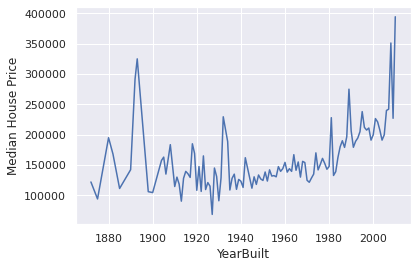

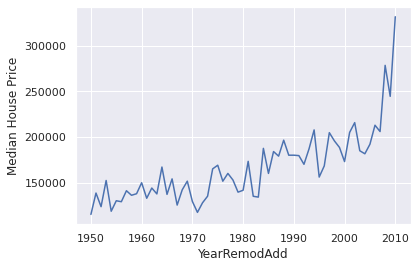

In [ ]:
year_features = ['YearBuilt','YearRemodAdd']

for feature in year_features:
    ax = df_train.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

In [ ]:
df_train['TotalBsmtSF'].mean()

1052.9958819492108

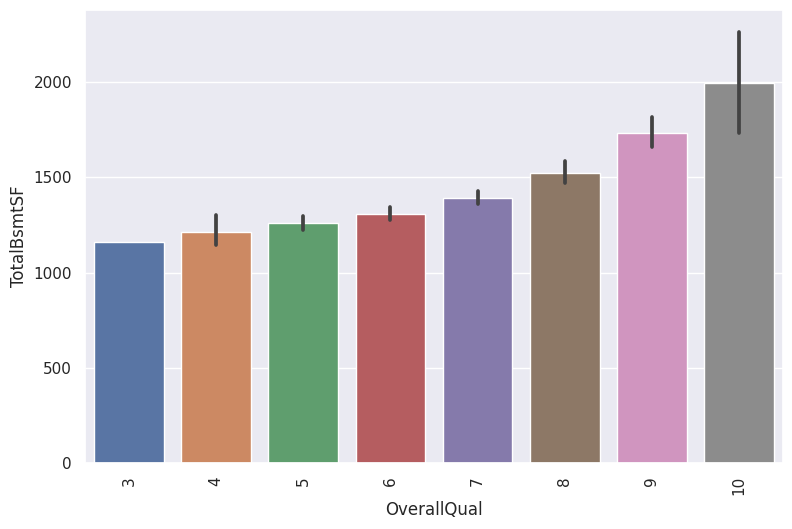

In [ ]:
asi = df_train[df_train['Sale_group'].isin(['34_180', '180_400', 'More_400']) & (df_train['TotalBsmtSF'] >= 1052)]

plt.figure(figsize=(9, 6), dpi = 100)
sns.barplot(x = 'OverallQual', y = 'TotalBsmtSF', data = asi)
plt.xticks(rotation = 90)
plt.show()

TotalBsmtSF ile OverallQual arasındaki ilişkiyi incelemek istiyoruz ve şu yorumu yapabiliriz; evlerin toplam metrekaresi arttıkça evin OverallQual değerliri de lineare yakın bir şekilde artış gösteriyor. Dolayısıyla aralarında anlamlı bir ilişki vardır denilebilir.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


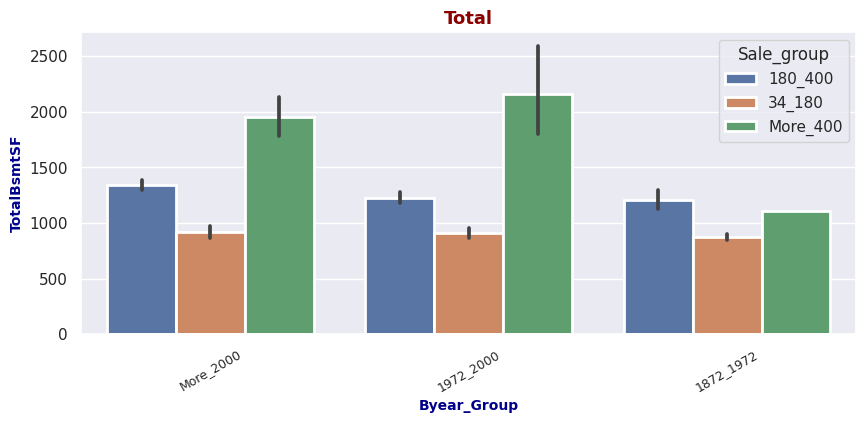

In [ ]:
#living_area = df_train[df_train.groupby('Sale_group')['GrLivArea']=='medium']
#asi = df_train[df_train['Sale_group'].isin(['low', 'medium', 'high']) & (df_train['TotalBsmtSF'] >= 1052)]
plt.figure(figsize=(10, 4),dpi=100)
sns.barplot(x = 'Byear_Group', y = 'TotalBsmtSF', data = df_train, hue = 'Sale_group',lw=2)
plt.title('Total', fontdict = title_style)
plt.xlabel('Byear_Group', fontdict = axis_style)
plt.ylabel('TotalBsmtSF', fontdict = axis_style)
plt.xticks(rotation = 30, fontsize = 9)
plt.show()

TotalBsmtSF için bu sefer merak ettiğim acaba bina yıllarına göre bakıldığında nasıl bir değişim gösteriyor. Yapım yılı artıkça aslında evlerin toplam metrekarelerinin artış göstermeye başladığını söyleyebiliyoruz. Hatta TotalBsmtSF ile Byer_Group değerlerini evlerin SaleGroup 'ları bakımından nasıl değerlendirilebilir onu gözlemlemek istiyoruz. Mesela evin fiyatı 400 den fazla olanlar 2000 den sonra yapılmış binalarda çoğunlukta olup, diğer fiyat gruplarına göre en fazla toplam metrekareye sahip evlerdir diyebiliriz.

In [ ]:
fig = px.histogram(df_train, x='Byear_Group', y= 'TotalBsmtSF', histnorm='probability density', color='Sale_group',barmode ='group')   
fig.show()

In [ ]:
asi =df_train[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

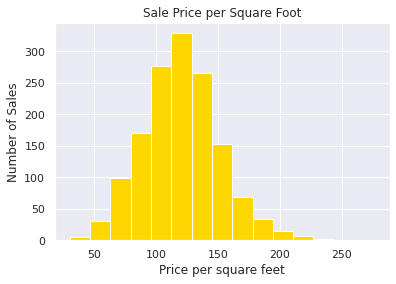

In [ ]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

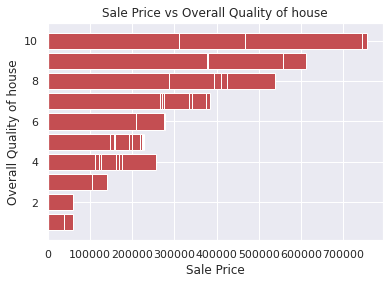

In [ ]:
plt.barh(df_train["OverallQual"],width=df_train["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

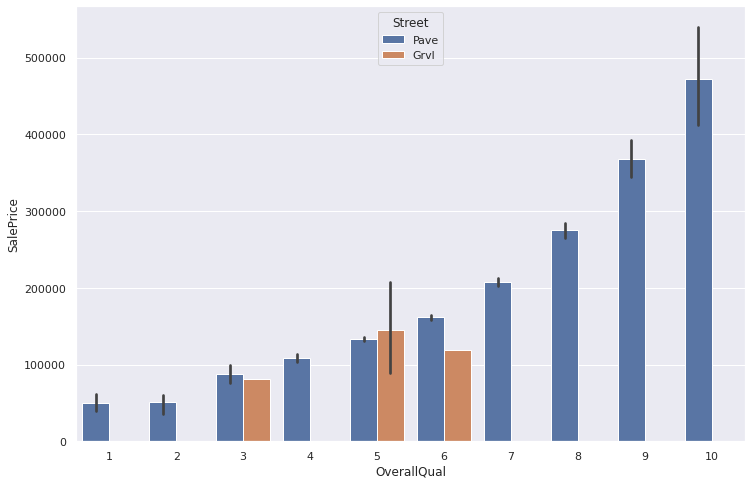

In [ ]:
# to check over all conditions of house with bed room
data = pd.concat([df_train['SalePrice'], df_train['OverallQual'],df_train['Street']],axis=1)
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="OverallQual", y="SalePrice", hue="Street",data=data)

MSZoning değerlerini gözlemleyip benim için SalePrice ile anlamlı bir ilişkiye sahip olup olmadığı üzerinde bir inceleme yapmak istiyorum.

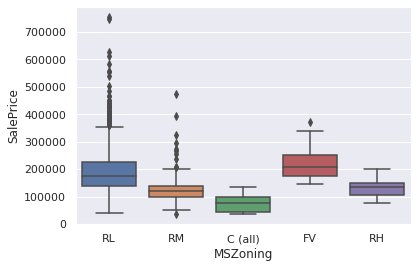

In [ ]:
sns.boxplot(data = df_train, x='MSZoning', y='SalePrice')


In [ ]:
df_train['SalePrice'].mean()


180942.13864104325

In [ ]:
def cluster_vals (price):
    if price > 180942.13864104325:
        return 1
    else:
        return 0
df_train['Cluster']=df_train['SalePrice'].apply(cluster_vals)


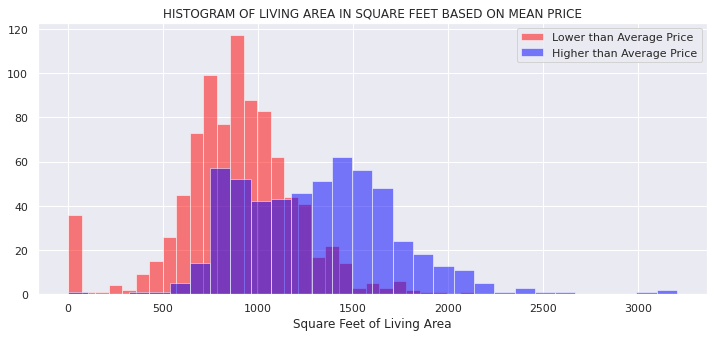

In [ ]:
plt.figure(figsize=(12,5))
df_train[df_train['Cluster']==0]['TotalBsmtSF'].hist(alpha=0.5,bins=30,label='Lower than Average Price',color='red')
df_train[df_train['Cluster']==1]['TotalBsmtSF'].hist(alpha=0.5,bins=30,label='Higher than Average Price',color='blue')
plt.legend()
plt.xlabel('Square Feet of Living Area')
plt.title("HISTOGRAM OF LIVING AREA IN SQUARE FEET BASED ON MEAN PRICE")
plt.savefig('hist2')

SalePrice 'ın ortalamasını alarak, evlerin toplam metrekarelerine göre ortlamanın altındakiler ile üsütündekiler arasında bir inceleme yapmak istiyorum. Ortalama fiyatın altındaki evlerin toplam metrekarelerinin de düşük olan kısımda olduğunu gözlemleyebiliriz. Bu aslında TotalBsmtSF ile SalePrice arasında anlamlı bir ilişki olduğunu söylemektedir.

### Getting hard core

SalePrice 'mızın tam olarak tespitini yapabilmek için bazı assumptionlarımızı gerçekleştirmemiz ve bunların normal olup olmadığına bakmak istiyoruz. Histograma baktığımızda siyahla gösterilen line bize normalin nasıl olması gerektiğini ama mavi line ise bize gerçekte olanı gösterir. Yani burda normalliği bozan bir durum olduğunu söyleyebiliriz. Q-Q pot ile de tekrar kontrol ediyoruz ve bu seferde kırmızı çizgi üzerinde takip etmesi gerekirdi ama yine bozan bir durum var ve artık SalePrice 'ın normal olmadığına karar vermiş oluyoruz.


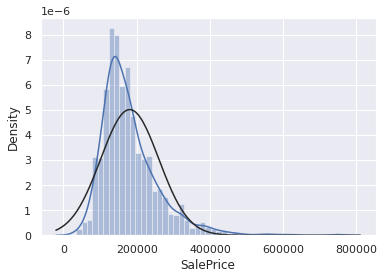

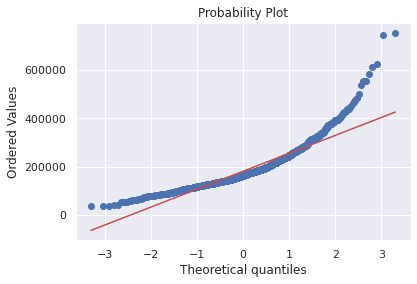

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Dolayısıyla SalePrice 'a bir log transform uygulayacağız. Ve log transform uygulandıktan sonra plotları terar incelediğimizde artık normale daha yakın bir şekilde dağılım gösterdiğini gözlemliyoruz.

In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

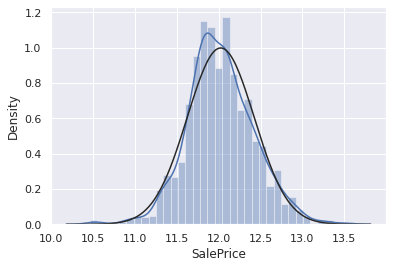

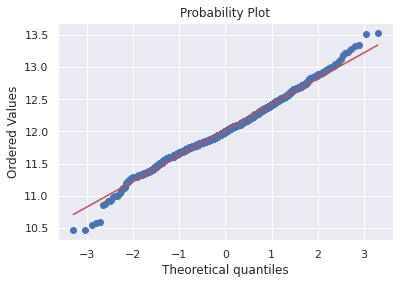

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

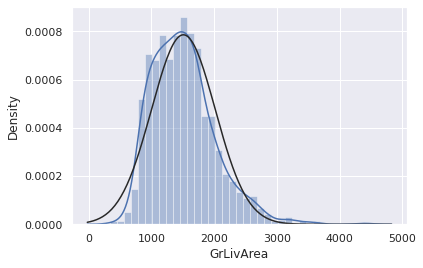

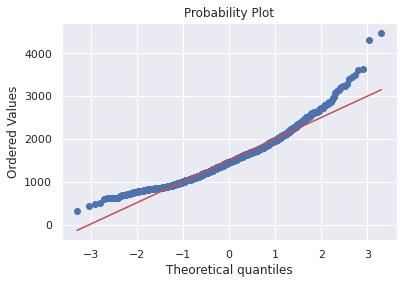

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

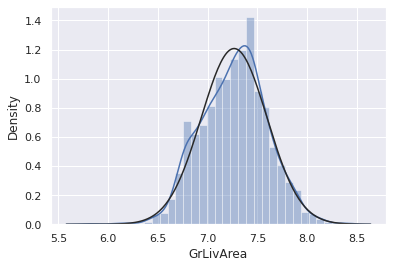

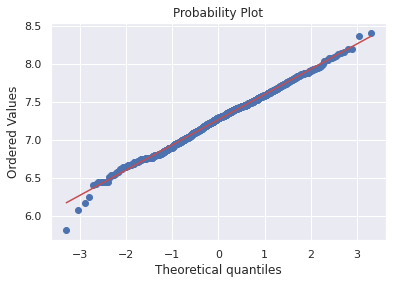

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

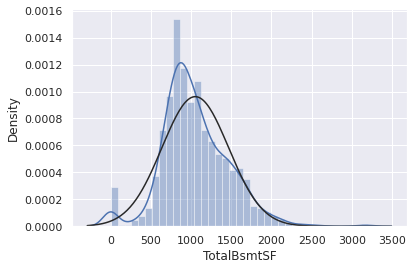

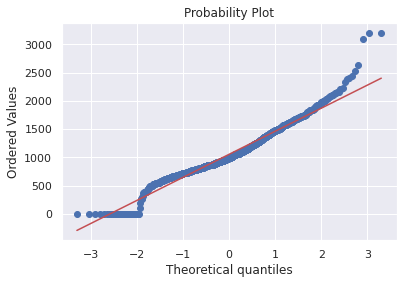

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

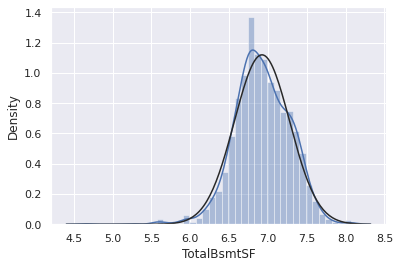

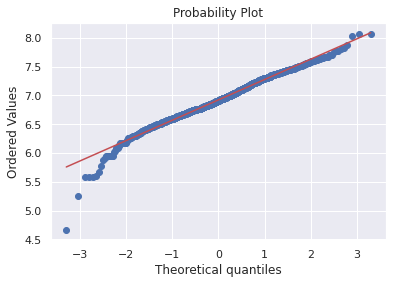

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

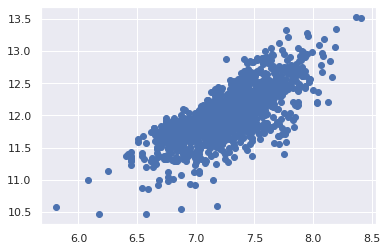

In [ ]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

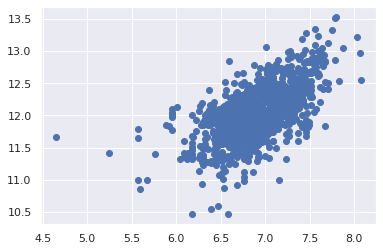

In [ ]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [ ]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [ ]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,has2ndFlr,hasBsmt,hasFireplace,hasGarage,hasPool,SalePriceSF,Cluster,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Byear_Group_1872_1972,Byear_Group_1972_2000,Byear_Group_More_2000,Sale_group_180_400,Sale_group_34_180,Sale_group_More_400
0,1,60,8450,7,5,2003,2003,706,0,150,6.752270,856,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,1,1,0,1,0,121.929825,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0

In [ ]:
df_train[cols].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,12.247694,7,7.444249,2,6.752270,2,2003,2003
1,12.109011,6,7.140453,2,7.140453,2,1976,1976
2,12.317167,7,7.487734,2,6.824374,2,2001,2002
3,11.849398,7,7.448334,3,6.628041,1,1915,1970
4,12.429216,8,7.695303,3,7.043160,2,2000,2000
